# Titanic Survival Prediction
Project ini bertujuan untuk memprediksi siapa yang selamat (**Survived = 1**) dan siapa yang tidak (**Survived = 0**) dari penumpang Titanic menggunakan teknik Machine Learning.

Dataset yang digunakan berasal dari kompetisi Kaggle: *Titanic - Machine Learning from Disaster*.

---

# Workflow / Steps

## 1. Import Data & Cek Struktur
Pada tahap ini dilakukan:
- Load dataset (`train.csv` dan `test.csv`)
- Cek jumlah baris dan kolom
- Cek missing values
- Cek tipe data
- Cek distribusi target (`Survived`)

---

## 2. Data Cleaning
Membersihkan data agar siap diproses:
- Menangani missing values
- Menghapus kolom yang tidak relevan (jika perlu)
- Konversi tipe data kategori menjadi numerik

---

## 3. Feature Engineering
Membuat fitur baru untuk meningkatkan akurasi model:
- Ekstraksi **Title** dari kolom `Name`
- Membuat fitur baru:
  - `FamilySize = SibSp + Parch + 1`
  - `IsAlone` (1 = sendirian, 0 = ada keluarga)
  - `AgeGroup` (binning umur)
  - `FareGroup` (binning harga tiket)
- One-hot encoding untuk fitur kategori:
  - `Sex`
  - `Embarked`
  - `Pclass`

---

## 4. Exploratory Data Analysis (EDA)
Melakukan analisis data menggunakan visualisasi:
- Korelasi antara fitur dengan survival rate
- Gender vs Survival
- Class vs Survival
- Distribusi umur
- Distribusi harga tiket
- Heatmap korelasi

---

## 5. Modeling
Menggunakan beberapa algoritma untuk membandingkan performa:

### - Logistic Regression
Model baseline untuk klasifikasi biner.

### - Decision Tree
Model non-linear yang mudah diinterpretasi.

### - XGBoost
Model boosting dengan akurasi tinggi dan sering unggul di leaderboard Kaggle.

---

## 6. Evaluation
Melakukan evaluasi model:
- Train-test split / cross-validation
- Metrik evaluasi:
  - Accuracy
  - Precision
  - Recall
  - F1-Score
  - Confusion Matrix
- Memilih model terbaik untuk memprediksi dataset test Kaggle.

---

## Submission Format (Kaggle)
CSV final format:

| PassengerId | Survived |
|-------------|----------|
| 892         | 0        |
| 893         | 1        |
| 894         | 0        |



### IMPORT LIBRARY

In [93]:
# Import library & dependencys
import pandas as pd
import numpy as np

### READ DATA USING PD

In [94]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

### SHOW DATA WITH HEAD AND TAIL

In [95]:
# Show the first 5 rows of the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
# Show the last 5 rows of the training data
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### INFORMATION DATA

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [99]:
train.shape

(891, 12)

In [100]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [101]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [104]:
count_sex = train["Sex"].value_counts()

index_sex = count_sex.index
values_sex = count_sex.values

In [105]:
index_sex

Index(['male', 'female'], dtype='object', name='Sex')

In [106]:
values_sex

array([577, 314])

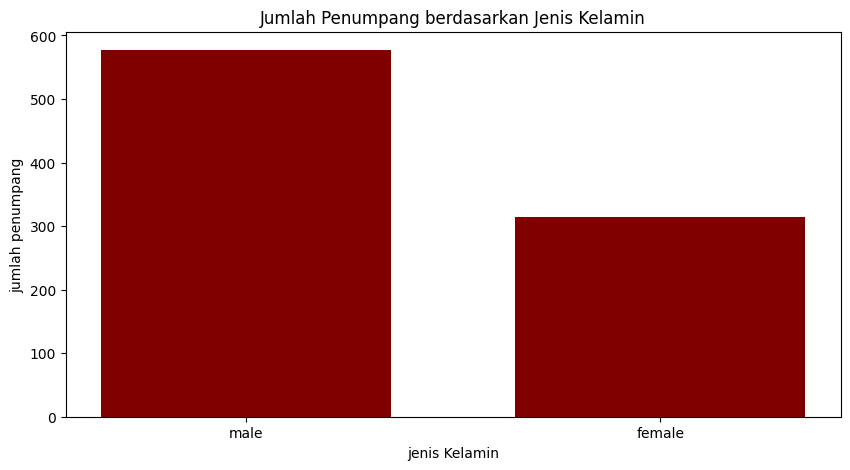

In [107]:
fig = plt.figure(figsize = (10, 5))
plt.bar(index_sex, values_sex, color = "maroon", width = 0.7)

plt.xlabel("jenis Kelamin")
plt.ylabel("jumlah penumpang")
plt.title("Jumlah Penumpang berdasarkan Jenis Kelamin")
plt.show()

In [108]:
def barchart(column) :
    count = train[column].value_counts()
    index = count.index
    values = count.values

    fig = plt.figure(figsize = (10, 5))
    plt.bar(index, values, color = "maroon", width = 0.7)

    plt.show()

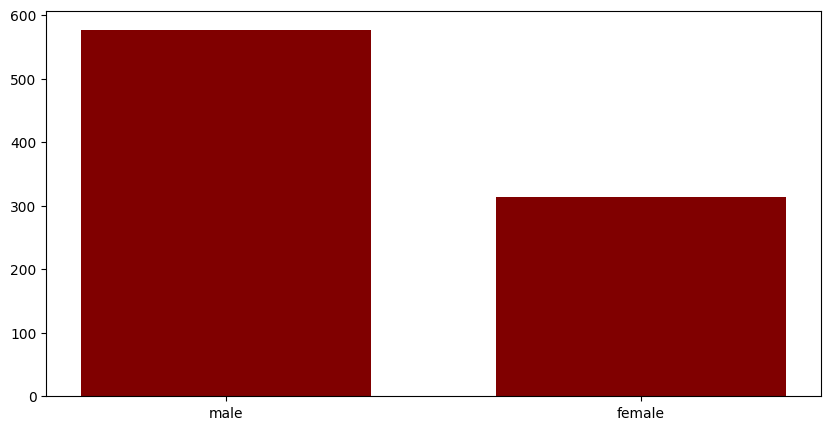

In [109]:
barchart("Sex")

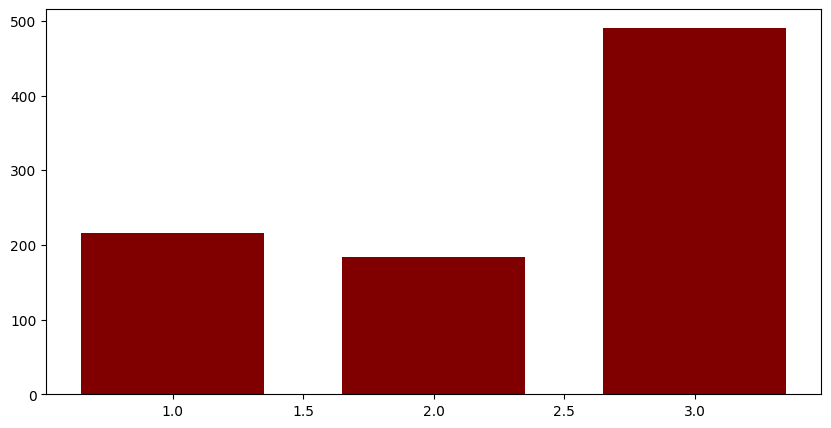

In [110]:
barchart("Pclass")

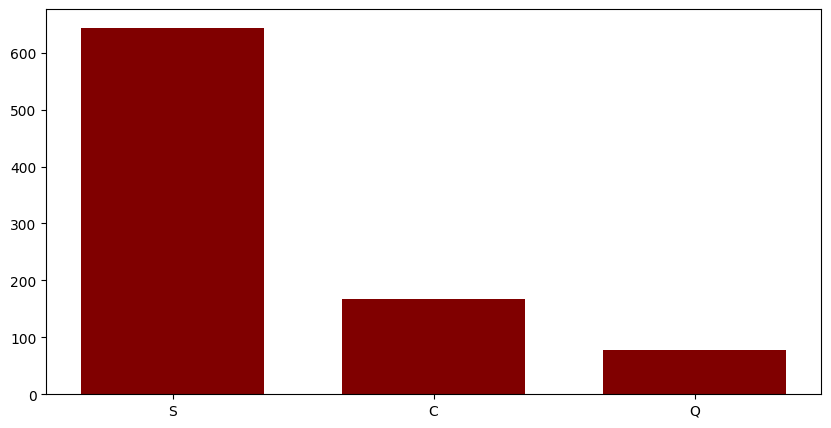

In [111]:
barchart("Embarked")

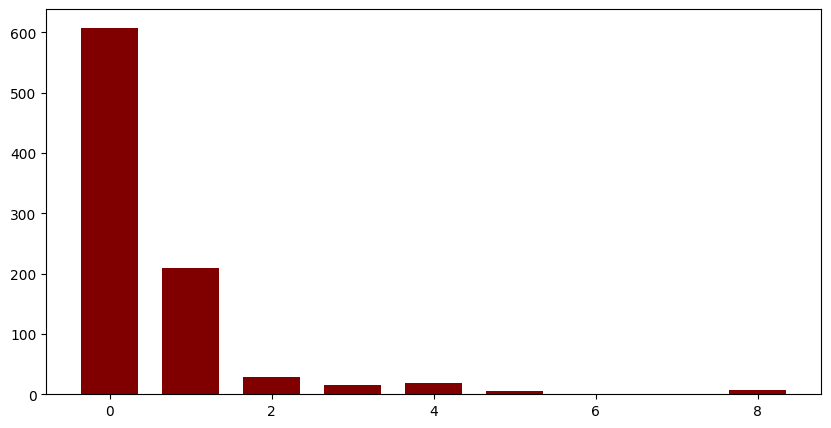

In [112]:
barchart("SibSp")

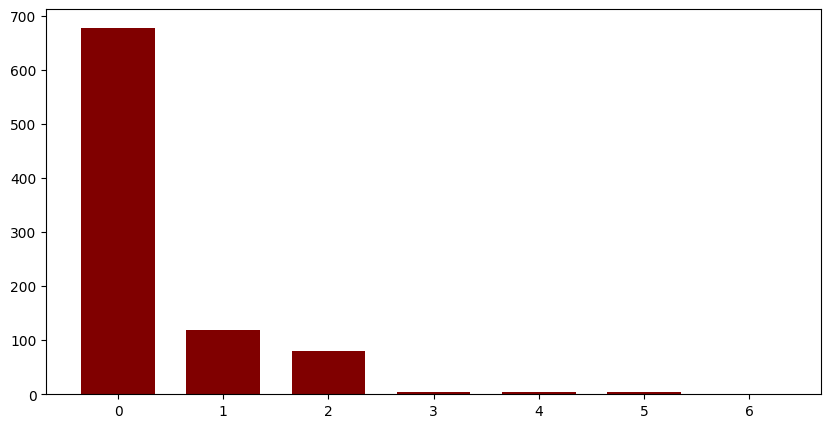

In [113]:
barchart("Parch")

In [114]:
survived = train.groupby(['Survived', "Sex"]).count()['PassengerId'].reset_index()

In [115]:
survived

,Survived,Sex,PassengerId
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


In [116]:
def group_barchart(column) :
    survived = train.groupby(['Survived', column]).count()['PassengerId'].reset_index()

    g = sns.catplot(
        data = survived, kind = "bar",
        x = "Survived", y = "PassengerId", hue = column,
        palette = "dark", height = 6
    )

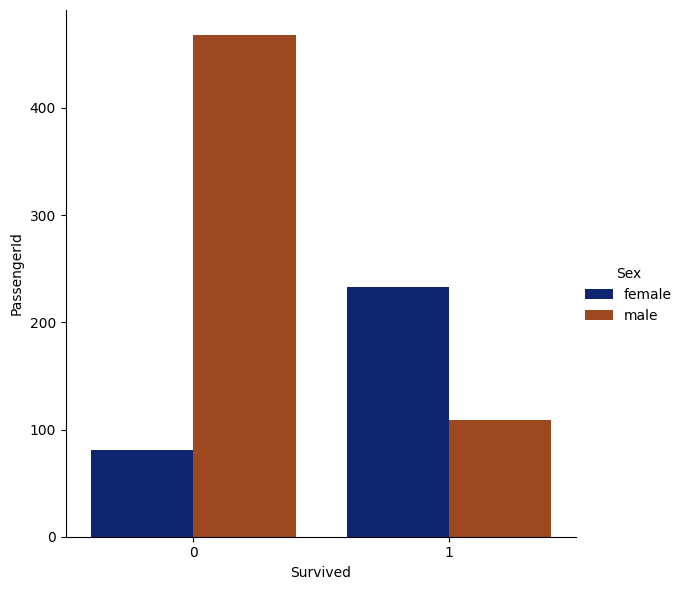

In [117]:
group_barchart("Sex")

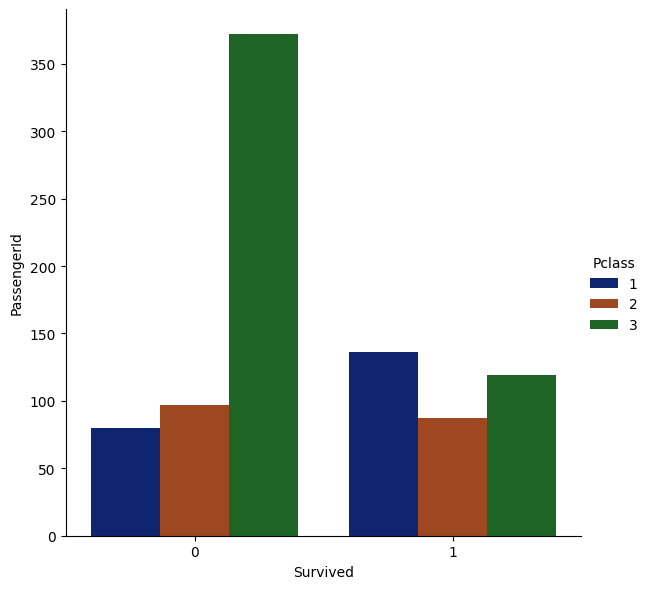

In [118]:
group_barchart("Pclass")

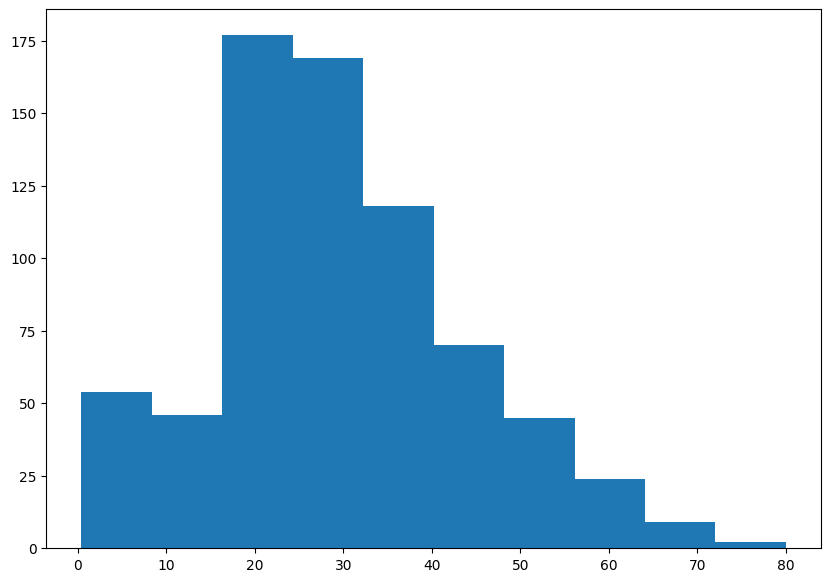

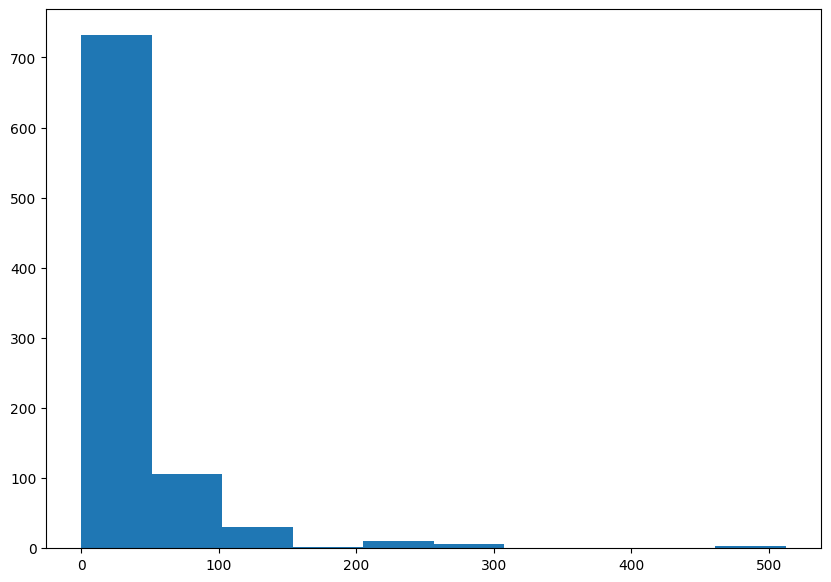

In [119]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(train.Age)

plt.show()

fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(train.Fare)

plt.show()

C:\Users\Gregorius Christian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Gregorius Christian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

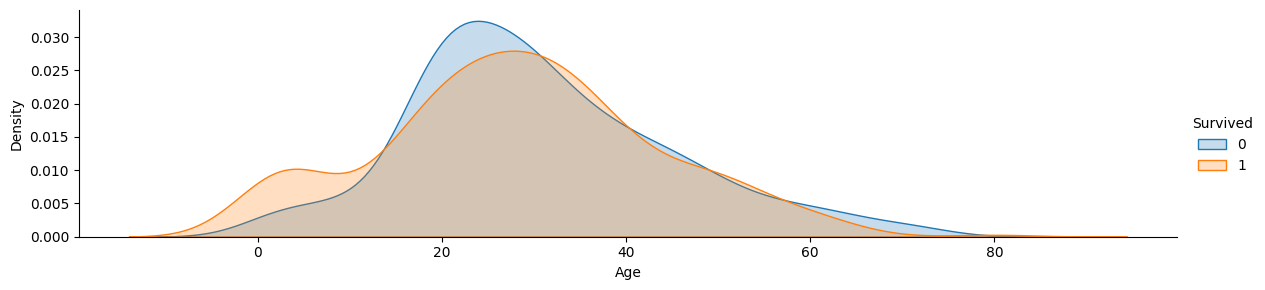

In [120]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.add_legend()
plt.show

C:\Users\Gregorius Christian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Gregorius Christian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

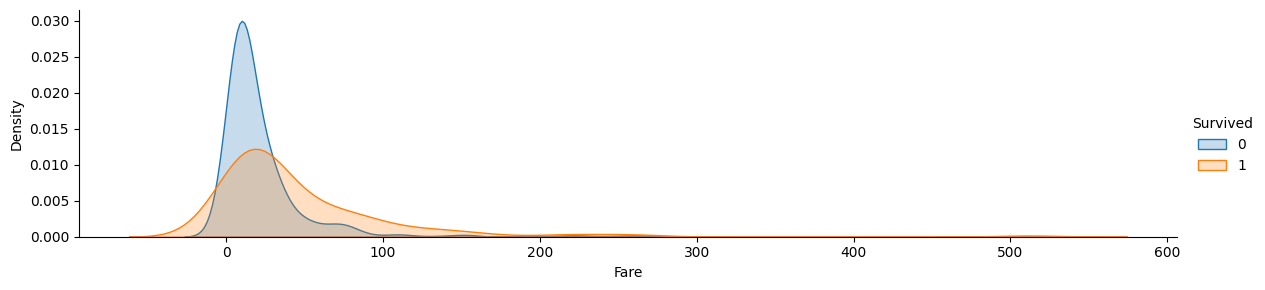

In [121]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.add_legend()
plt.show

## Preprocessing Data

### Fill missing value

In [122]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [124]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [125]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Fill missing value Embarked

In [126]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [127]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [128]:
modus_embarked = train['Embarked'].mode()[0]
modus_embarked

'S'

In [129]:
train['Embarked'] = train['Embarked'].fillna(modus_embarked)

In [130]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Fill missing value Age

In [131]:
mean_age = train['Age'].mean()
mean_age

np.float64(29.69911764705882)

In [132]:
train['Age'] = train['Age'].fillna(mean_age)

In [133]:
mean_age_test = test['Age'].mean()
mean_age_test

np.float64(30.272590361445783)

In [134]:
test['Age'] = test['Age'].fillna(mean_age_test)

### Fill missing value data Fare

In [135]:
mean_fare_test = test['Fare'].mean()
test['Fare'] = test['Fare'].fillna(mean_fare_test)

### Drop data cabin

In [136]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

train.isnull().sum()
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Convert Data to Numberic

In [137]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [138]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [139]:
sex_mapping = {"male": 1, "female" : 0} 

train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [140]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [141]:
embarked = train[['Embarked']]
dummies = pd.get_dummies(embarked, dtype=int)

dummies.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [142]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [143]:
train = pd.merge(train.reset_index(), dummies.reset_index())
train.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,0,1
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,0,1


In [144]:
train = train.drop(['index', 'Embarked'], axis = 1)

In [145]:
embarked_test = test[['Embarked']]
dummies_test = pd.get_dummies(embarked_test, dtype=int)

In [146]:
test = pd.merge(test.reset_index(), dummies_test.reset_index())

test = test.drop(['index', 'Embarked'], axis = 1)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,0,1


In [147]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [148]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,Mr


In [149]:
title_mapping = {
    "Mr": 0,
    "Miss": 1,
    "Mrs": 2,
    "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3, "Countess": 3,
    "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona": 3, "Mme": 3, "Capt": 3, "Sir": 3
    }

train['Title'] = train['Title'].map(title_mapping)


In [150]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,0


In [151]:
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [152]:
test['Title'] = test['Title'].map(title_mapping)

In [153]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,0,1,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,1,0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,0,1,2


In [154]:
train.shape, test.shape

((891, 14), (418, 13))

In [155]:
train = train.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
test_id = test[['PassengerId']]

test = test.drop({'PassengerId', 'Name', 'Ticket'}, axis = 1)

In [156]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,0,3,1,22.0,1,0,7.2500,0,0,1,0
1,1,1,0,38.0,1,0,71.2833,1,0,0,2
2,1,3,0,26.0,0,0,7.9250,0,0,1,1
3,1,1,0,35.0,1,0,53.1000,0,0,1,2
4,0,3,1,35.0,0,0,8.0500,0,0,1,0


In [157]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,1,34.5,0,0,7.8292,0,1,0,0
1,3,0,47.0,1,0,7.0000,0,0,1,2
2,2,1,62.0,0,0,9.6875,0,1,0,0
3,3,1,27.0,0,0,8.6625,0,0,1,0
4,3,0,22.0,1,1,12.2875,0,0,1,2


## Modelling

In [158]:
train.shape, test.shape

((891, 11), (418, 10))

In [159]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,0,3,1,22.0,1,0,7.2500,0,0,1,0
1,1,1,0,38.0,1,0,71.2833,1,0,0,2
2,1,3,0,26.0,0,0,7.9250,0,0,1,1
3,1,1,0,35.0,1,0,53.1000,0,0,1,2
4,0,3,1,35.0,0,0,8.0500,0,0,1,0


In [160]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,1,34.5,0,0,7.8292,0,1,0,0
1,3,0,47.0,1,0,7.0000,0,0,1,2
2,2,1,62.0,0,0,9.6875,0,1,0,0
3,3,1,27.0,0,0,8.6625,0,0,1,0
4,3,0,22.0,1,1,12.2875,0,0,1,2


In [175]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

In [161]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

In [188]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.7        0.82022472 0.7752809  0.78651685 0.83146067 0.79775281
 0.75280899 0.7752809  0.75280899 0.71910112]


In [189]:
score.mean()

np.float64(0.7711235955056179)

In [194]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=1,
    gamma=0,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = XGBClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.85393258 0.78651685 0.82022472 0.85393258 0.84269663
 0.83146067 0.85393258 0.78651685 0.83146067]


In [195]:
score.mean()

np.float64(0.823845193508115)

## Prediction

In [196]:
clf = XGBClassifier()
clf.fit(train_data, target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [197]:
prediction = clf.predict(test)

In [198]:
df_test = pd.read_csv("data/test.csv")
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": prediction
})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [199]:
submission.to_csv("submission.csv", index=False)